In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

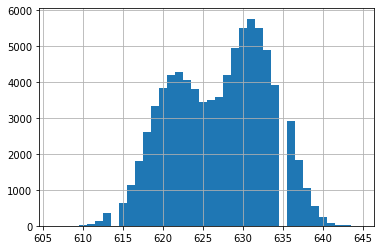

In [3]:
data=pd.read_csv("github/sensor_data/sensor_data_600.txt", delimiter=" ", header=None, names=("date", "time", "ir", "lidar"))

data["lidar"].hist(bins=max(data["lidar"])-min(data["lidar"]), align="left")
plt.show()

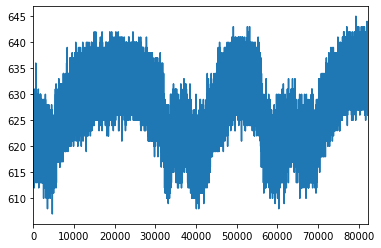

In [4]:
data.lidar.plot()
plt.show()

In [5]:
data["hour"]=[e//10000 for e in data.time]
data.transpose()

,0,1,2,3,4,5,6,7,8,9,...,82291,82292,82293,82294,82295,82296,82297,82298,82299,82300
date,20180202,20180202,20180202,20180202,20180202,20180202,20180202,20180202,20180202,20180202,...,20180205,20180205,20180205,20180205,20180205,20180205,20180205,20180205,20180205,20180205
time,110001,110004,110007,110010,110013,110016,110019,110022,110025,110028,...,84201,84204,84208,84210,84214,84216,84220,84222,84225,84228
ir,28,17,14,31,24,20,18,27,20,32,...,35,37,25,38,11,39,13,37,36,33
lidar,627,626,627,622,630,626,624,629,628,621,...,631,631,631,630,644,634,637,633,633,634
hour,11,11,11,11,11,11,11,11,11,11,...,8,8,8,8,8,8,8,8,8,8


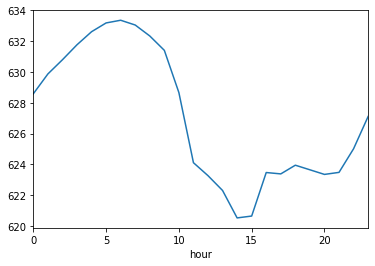

In [6]:
d = data.groupby("hour")
d.lidar.mean().plot()
plt.show()

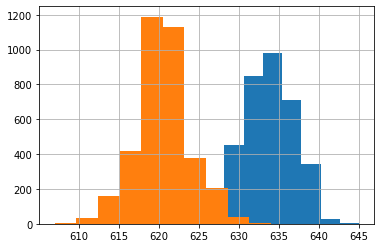

In [9]:
d.lidar.get_group(6).hist()
d.lidar.get_group(14).hist()
plt.show()

In [10]:
each_hour = {i : d.lidar.get_group(i).value_counts().sort_index() for i in range(24)}
freqs = pd.concat(each_hour, axis=1)
freqs = freqs.fillna(0)
probs = freqs/len(data["lidar"])

probs

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
607,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000012,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
608,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000012,0.000000,0.000000,0.000000,0.000000,0.000000,0.000012,0.000012,0.000000,0.000000
609,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000024,0.000000,0.000000,0.000000,0.000000,0.000000,0.000012,0.000012,0.000000
610,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000036,0.000049,0.000000,0.000000,0.000012,0.000012,0.000134,0.000000,0.000000,0.000000
611,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000146,0.000122,0.000000,0.000000,0.000000,0.000024,0.000073,0.000146,0.000049,0.000000
612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000219,0.000316,0.000000,0.000036,0.000036,0.000061,0.000255,0.000194,0.000024,0.000012
613,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000620,0.000644,0.000024,0.000182,0.000061,0.000219,0.000680,0.000437,0.000109,0.000024
615,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.001300,0.001045,0.000024,0.000207,0.000267,0.000377,0.000984,0.001021,0.000474,0.000049
616,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.001956,0.001810,0.000219,0.000595,0.000595,0.001021,0.001725,0.001397,0.000595,0.000085
617,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.003111,0.002928,0.000510,0.001264,0.000923,0.001640,0.002211,0.002296,0.001021,0.000146


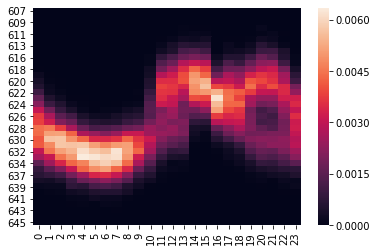

In [11]:
import seaborn as sns

sns.heatmap(probs)
plt.show()

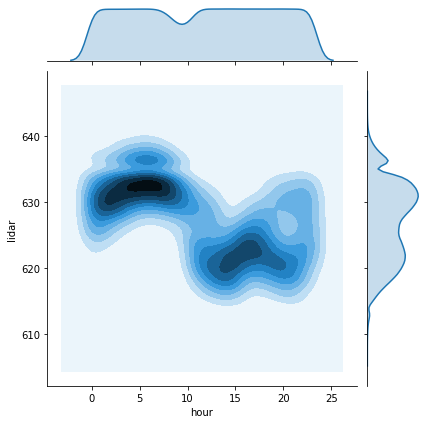

In [12]:
sns.jointplot(data["hour"], data["lidar"], data, kind="kde")
plt.show()

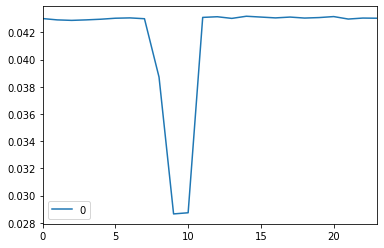

In [13]:
p_t = pd.DataFrame(probs.sum())
p_t.plot()
plt.show()

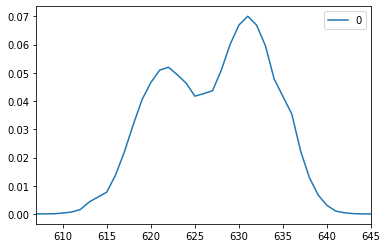

In [15]:
p_z = pd.DataFrame(probs.transpose().sum())
p_z.plot()
plt.show()

In [16]:
p_t[0]

0     0.043013
1     0.042916
2     0.042879
3     0.042916
4     0.042964
5     0.043037
6     0.043061
7     0.043001
8     0.038712
9     0.028651
10    0.028736
11    0.043098
12    0.043146
13    0.043025
14    0.043183
15    0.043122
16    0.043061
17    0.043122
18    0.043049
19    0.043086
20    0.043159
21    0.042976
22    0.043049
23    0.043037
Name: 0, dtype: float64

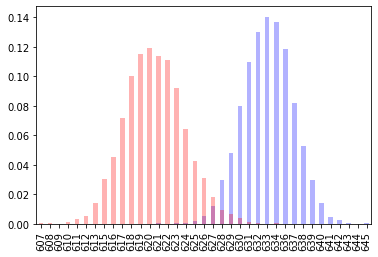

In [17]:
cond_z_t = probs/p_t[0]
cond_z_t[6].plot.bar(color="blue", alpha=0.3)
cond_z_t[14].plot.bar(color="red", alpha=0.3)
plt.show()

In [18]:
cond_t_z = probs.transpose()/probs.transpose().sum()
print(cond_z_t[13][630], cond_t_z[630][13]*p_z[0][630]/p_t[0][13])

0.036147980796385204 0.036147980796385204


In [19]:
def bayes_estimation(sensor_value, current_estimation):
    new_estimation = []
    for i in range(24):
        new_estimation.append(cond_z_t[i][sensor_value]*current_estimation[i])
    return new_estimation/sum(new_estimation)

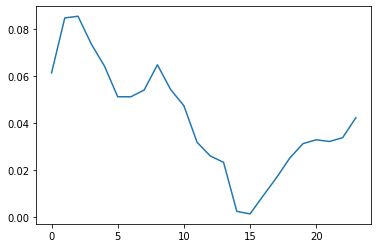

In [20]:
estimation=bayes_estimation(630, p_t[0])
plt.plot(estimation)

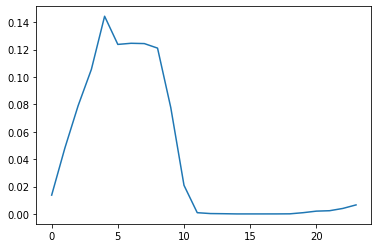

In [21]:
values_5 = [630, 632, 636]
estimation = p_t[0]
for v in values_5:
    estimation = bayes_estimation(v, estimation)
plt.plot(estimation)